In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir("/content/gdrive/MyDrive/PPHAU/YOLO_Object_Detection/YOLOv8_new/")
!ls

config.yaml	    images_all	yolov8n.pt
data		    labels_all	YOLOv8_Object_Detection.ipynb
furniture_assembly  weights	YOLOv8_Object_Detection_Ray_Tune.ipynb


In [ ]:
!nvidia-smi

Mon Jul 17 08:59:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0    44W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%%capture
!pip install ultralytics
!pip install -U ultralytics 'ray[tune]'

In [ ]:
from PIL import Image
import cv2
import json
import random
import shutil

from ultralytics import YOLO
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ray.tune.analysis import ExperimentAnalysis

Ultralytics YOLOv8.0.136 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 24.5/166.8 GB disk)


In [ ]:
ROOT_DIR = '/content/gdrive/MyDrive/PPHAU/YOLO_Object_Detection/YOLOv8_new/'

In [ ]:
%cd /content/gdrive/MyDrive/PPHAU/YOLO_Object_Detection/YOLOv8_new

/content


In [10]:
model = YOLO("weights/yoloncustom.pt")
result_grid = model.tune(data="/content/gdrive/MyDrive/PPHAU/YOLO_Object_Detection/YOLOv8_new/config.yaml", epochs=200, gpu_per_trial=1, max_samples= 50, project="furniture_assembly")

Output hidden; open in https://colab.research.google.com to view.

In [11]:
tune_result = result_grid.get_best_result(metric="metrics/mAP50(B)", mode="max")
tune_result

Result(
  metrics={'metrics/precision(B)': 0.9813748994505701, 'metrics/recall(B)': 0.9739709384884865, 'metrics/mAP50(B)': 0.9863246328461237, 'metrics/mAP50-95(B)': 0.7943547255026637, 'epoch': 53, 'done': True, 'trial_id': '876e0_00045', 'experiment_tag': '45_box=0.1637,cls=0.6099,copy_paste=0.3668,degrees=5.9566,fliplr=0.9198,flipud=0.4743,hsv_h=0.0710,hsv_s=0.4128,hsv_v=0.5563,lr0=0.0521,lrf=0.7509,mixup=0.4126,momentum=0.6372,mosaic=0.7110,perspective=0.0004,scale=0.4582,shear=6.2719,translate=0.6819,warmup_epochs=0.3436,warmup_momentum=0.0607,weight_decay=0.0004'},
  path='/content/gdrive/MyDrive/PPHAU/YOLO_Object_Detection/YOLOv8_new/runs/tune/_tune_2023-07-17_09-01-30/_tune_876e0_00045_45_box=0.1637,cls=0.6099,copy_paste=0.3668,degrees=5.9566,fliplr=0.9198,flipud=0.4743,hsv_h=0.0710,hsv_s=0.4128,_2023-07-17_10-21-49',
  checkpoint=None
)

In [ ]:
log_dir = "/content/gdrive/MyDrive/PPHAU/YOLO_Object_Detection/yolov8/runs/tune/_tune_2023-07-06_19-01-21"
analysis = ExperimentAnalysis(log_dir)

In [13]:
if result_grid.errors:
    print("One or more trials failed!")
else:
    print("No errors!")

No errors!


In [14]:
for i, result in enumerate(result_grid):
    print(f"Trial #{i}: Configuration: {result.config}, Last Reported Metrics: {result.metrics}")

Trial #0: Configuration: {'lr0': 0.07497313428651464, 'lrf': 0.8761865321173105, 'momentum': 0.6776655764417817, 'weight_decay': 2.5130196098301915e-05, 'warmup_epochs': 3.3332841870436414, 'warmup_momentum': 0.597372749577905, 'box': 0.030849106717215597, 'cls': 2.678081168500623, 'hsv_h': 0.056038664241400395, 'hsv_s': 0.3403555625565611, 'hsv_v': 0.26931542624911115, 'degrees': 8.100671513394092, 'translate': 0.34800387927725196, 'scale': 0.3600943142103038, 'shear': 9.255472934581242, 'perspective': 0.000871435944525849, 'flipud': 0.5021161698030321, 'fliplr': 0.884388307382383, 'mosaic': 0.5224003867800692, 'mixup': 0.7058544324633866, 'copy_paste': 0.14807166469136124, 'data': '/content/gdrive/MyDrive/PPHAU/YOLO_Object_Detection/YOLOv8_new/config.yaml', 'epochs': 200, 'project': 'furniture_assembly'}, Last Reported Metrics: {'metrics/precision(B)': 0.9163455963632515, 'metrics/recall(B)': 0.9046593475137322, 'metrics/mAP50(B)': 0.9503169884026282, 'metrics/mAP50-95(B)': 0.7950075

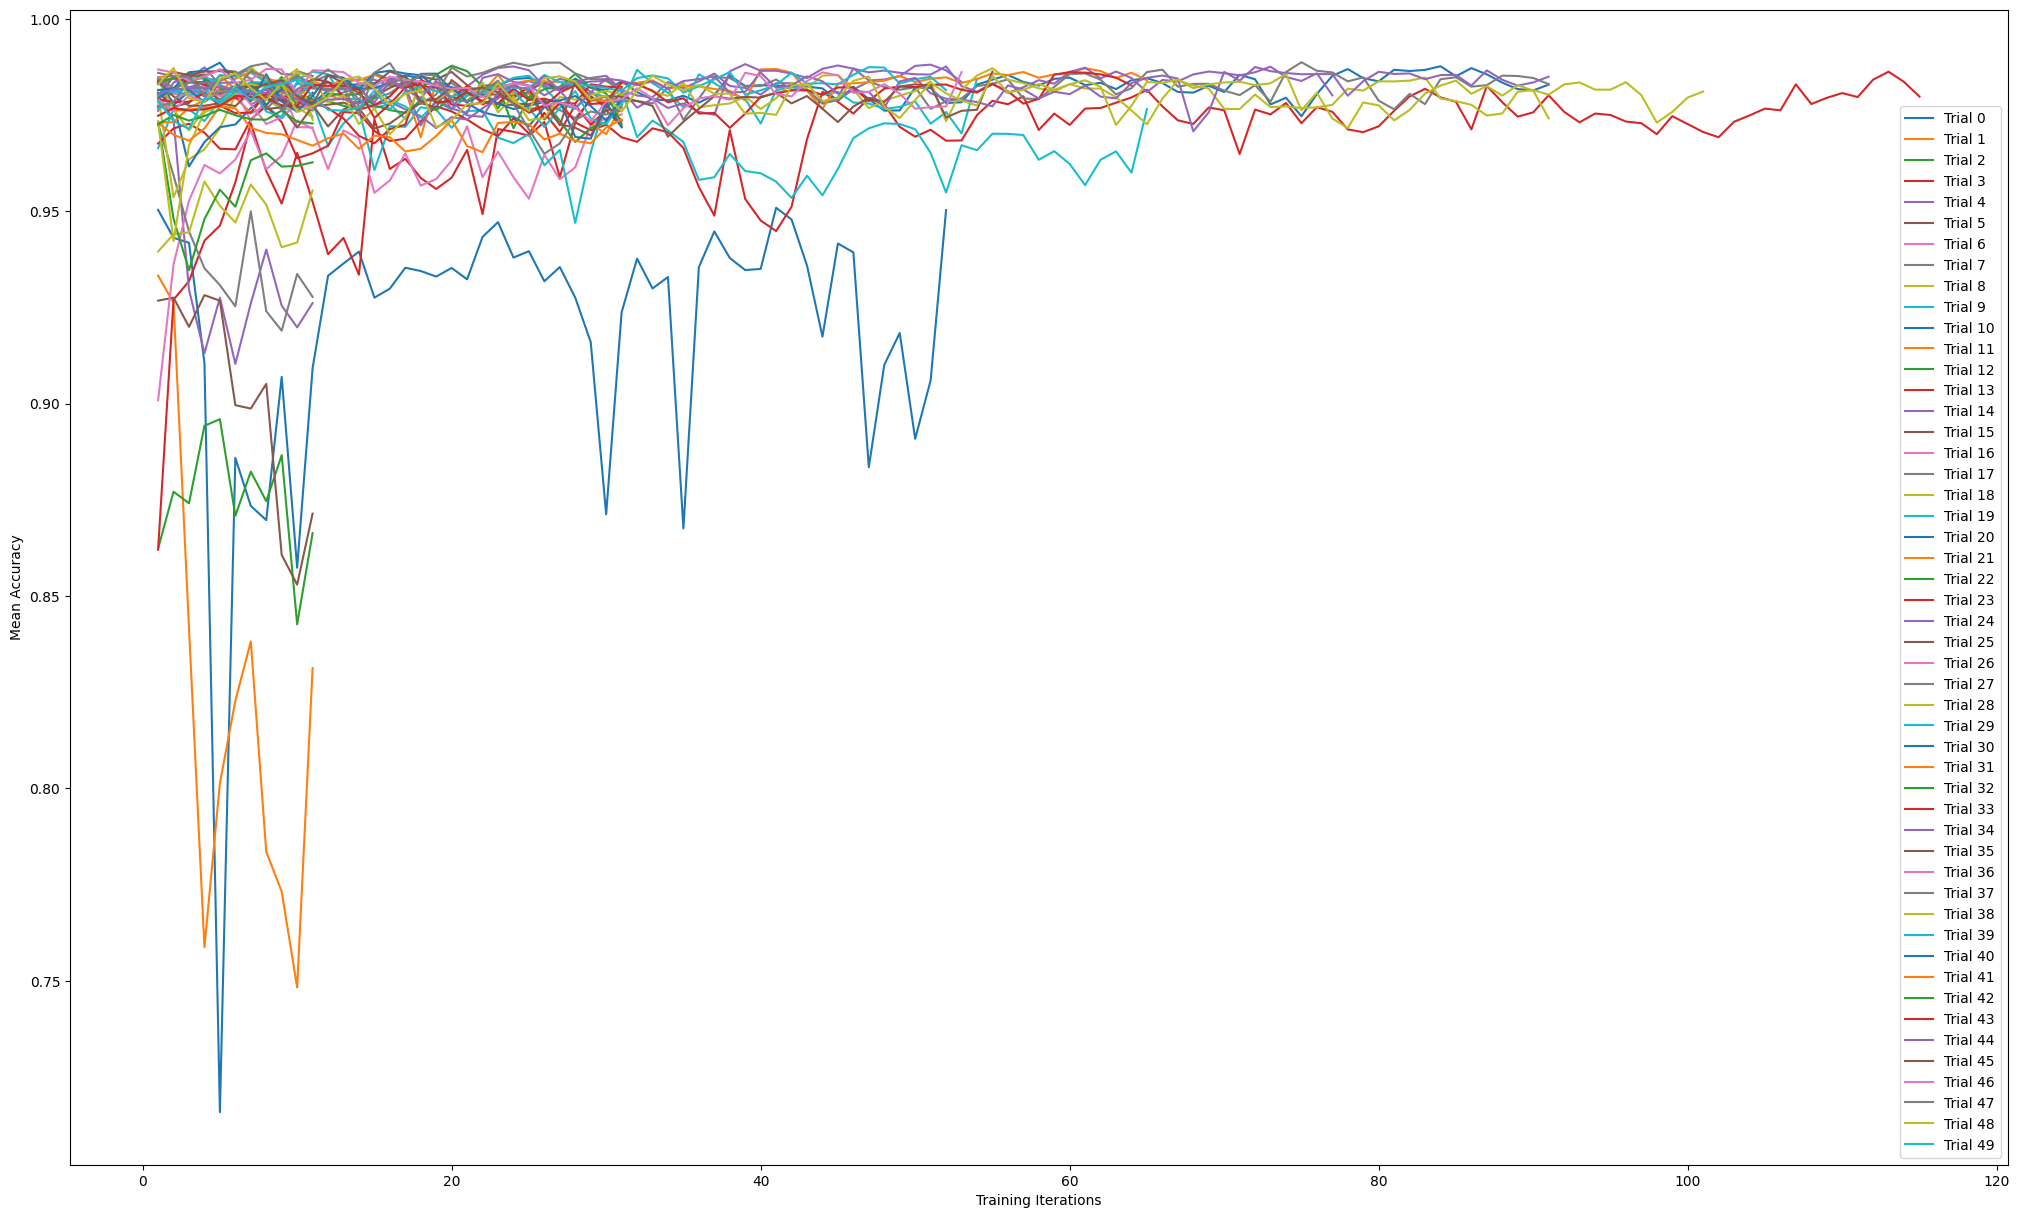

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 15))

for i, result in enumerate(result_grid):
    plt.plot(result.metrics_dataframe["training_iteration"], result.metrics_dataframe["metrics/mAP50(B)"], label=f"Trial {i}")

plt.xlabel('Training Iterations')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.show()
